In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from ucimlrepo import fetch_ucirepo 

import gudhi

from TopoMapCut import TopoMapCut
from TopoMap import TopoMap

In [8]:
def plot_persistance_diagram(X):
    rips_original = gudhi.RipsComplex(points=X.to_numpy())
    st_original = rips_original.create_simplex_tree(max_dimension=1)

    diag_original = st_original.persistence(min_persistence=0)

    # Create image
    fig, axs = plt.subplots(1, 1, figsize=(4, 4))

    gudhi.plot_persistence_diagram(diag_original, axes=axs)
    axs.set_title('Persistance Diagram')

    return fig

def plot_persistance_diagrams_projection(X, proj, y, y_column='class'):
    rips_original = gudhi.RipsComplex(points=X.to_numpy())
    st_original = rips_original.create_simplex_tree(max_dimension=1)

    rips_proj = gudhi.RipsComplex(points=proj)
    st_projection = rips_proj.create_simplex_tree(max_dimension=1)

    diag_original = st_original.persistence(min_persistence=0)
    diag_proj = st_projection.persistence(min_persistence=0)

    I_original = st_original.persistence_intervals_in_dimension(1)
    I_proj = st_projection.persistence_intervals_in_dimension(1)

    bt_blobs = gudhi.bottleneck_distance(I_original, I_proj)
    print(f"Bottleneck distance: {bt_blobs:.10f}")    

    # Create image
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    gudhi.plot_persistence_diagram(diag_original, axes=axs[0])
    axs[0].set_title('Persistance - Original Points')

    gudhi.plot_persistence_diagram(diag_proj, axes=axs[1])
    axs[1].set_title('Persistance - Projections')

    colors = [px.colors.qualitative.D3[i] for i in range(10)]

    i = 0
    for cluster in y[y_column].unique():
        i_cluster = list(y[y[y_column]==cluster].index)
        axs[2].scatter(proj[i_cluster,0], proj[i_cluster,1],
                c=colors[i], s=5)
        i += 1
    axs[2].set_xticks([])
    axs[2].set_yticks([])
    axs[2].set_title('Projection')
    
    fig.suptitle('Persistence diagrams and Projection')
    fig.tight_layout()
    
    return fig

def plot_proj_min_dists(X, y, y_column, min_dists,
                        proj_method='tsne', ignore_outliers=False):
    
    colors = [px.colors.qualitative.D3[i] for i in range(10)]
    
    projs = []

    for d in min_dists:
        topocut = TopoMapCut(X.to_numpy(),
                             max_dist=d,
                             proj_method=proj_method,
                             ignore_outliers=ignore_outliers)
        projs.append(topocut.run())

    y_column = 'class'
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    for d in range(len(min_dists)):
        i = 0
        for cluster in y[y_column].unique():
            i_cluster = list(y[y[y_column]==cluster].index)
            axs[d].scatter(projs[d][i_cluster,0], projs[d][i_cluster,1],
                    c=colors[i], s=5)
            i += 1
            
        axs[d].set_xticks([])
        axs[d].set_yticks([])
        axs[d].set_title(f'Min dist = {min_dists[d]}')

    fig.suptitle('Projection with different min dist')
    plt.tight_layout()

    return fig

def plot_proj_max_comps(X, y, y_column, max_comps,
                        proj_method='tsne', ignore_outliers=False):
    
    colors = [px.colors.qualitative.D3[i] for i in range(10)]
    
    projs = []

    for d in max_comps:
        topocut = TopoMapCut(X.to_numpy(),
                             max_components=d,
                             proj_method=proj_method,
                             ignore_outliers=ignore_outliers)
        projs.append(topocut.run())

    y_column = 'class'
    n_plots = len(max_comps)
    fig, axs = plt.subplots(1, n_plots, figsize=(n_plots*4, 4))

    for d in range(n_plots):
        i = 0
        for cluster in y[y_column].unique():
            i_cluster = list(y[y[y_column]==cluster].index)
            axs[d].scatter(projs[d][i_cluster,0], projs[d][i_cluster,1],
                    c=colors[i], s=5)
            i += 1
            
        axs[d].set_xticks([])
        axs[d].set_yticks([])
        axs[d].set_title(f'Max components = {max_comps[d]}')

    fig.suptitle('Projection with different max_components')
    plt.tight_layout()

    return fig

## Iris

In [3]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

/home/user/anaconda3/envs/topomap/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


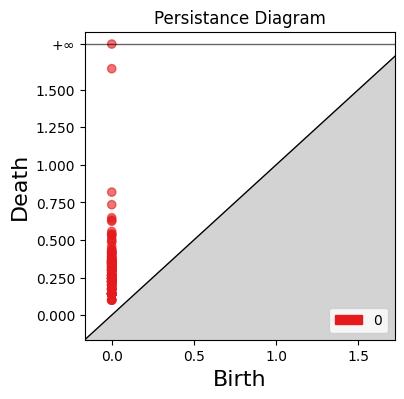

In [4]:
plot_persistance_diagram(X)
plt.show()

In [5]:
max_dist = 0.5
topocut_iris = TopoMapCut(X.to_numpy(), 
                          max_dist=max_dist,
                          proj_method='tsne',
                          ignore_outliers=False)
proj_iris = topocut_iris.run()
print(f'Number of components: {len(topocut_iris.subsets)}')

[INFO] Min distance hit. Distance: 0.5099019513592786 | Max_dist: 0.5
Number of components: 12


Bottleneck distance: 0.0000000000


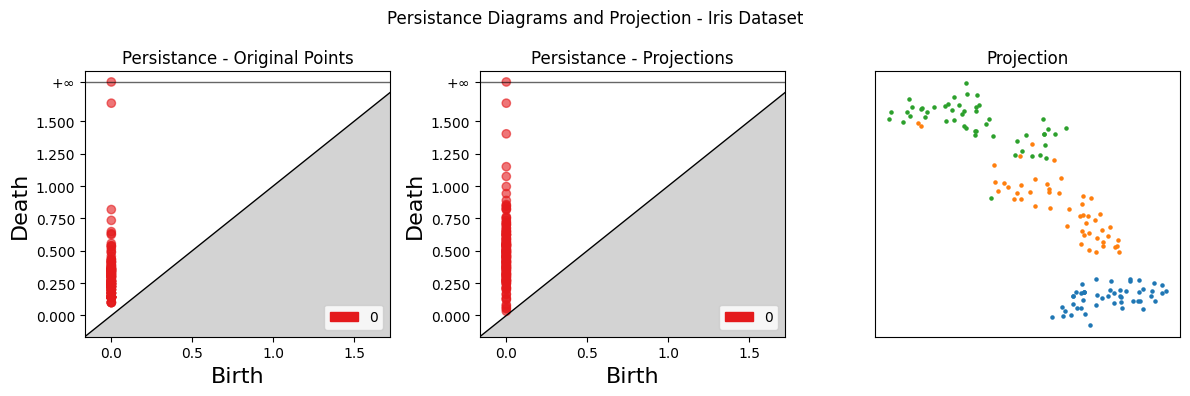

In [6]:
fig_iris = plot_persistance_diagrams_projection(X, proj_iris, y)
fig_iris.suptitle('Persistance Diagrams and Projection - Iris Dataset')
plt.show()

[INFO] Min distance hit. Distance: 0.26457513110645864 | Max_dist: 0.25
[INFO] Min distance hit. Distance: 0.5099019513592786 | Max_dist: 0.5
[INFO] Min distance hit. Distance: 0.818535277187245 | Max_dist: 0.75
[INFO] Min distance hit. Distance: 1.6401219466856727 | Max_dist: 1.0
[INFO] Number of edges hit. Edges processed: 148


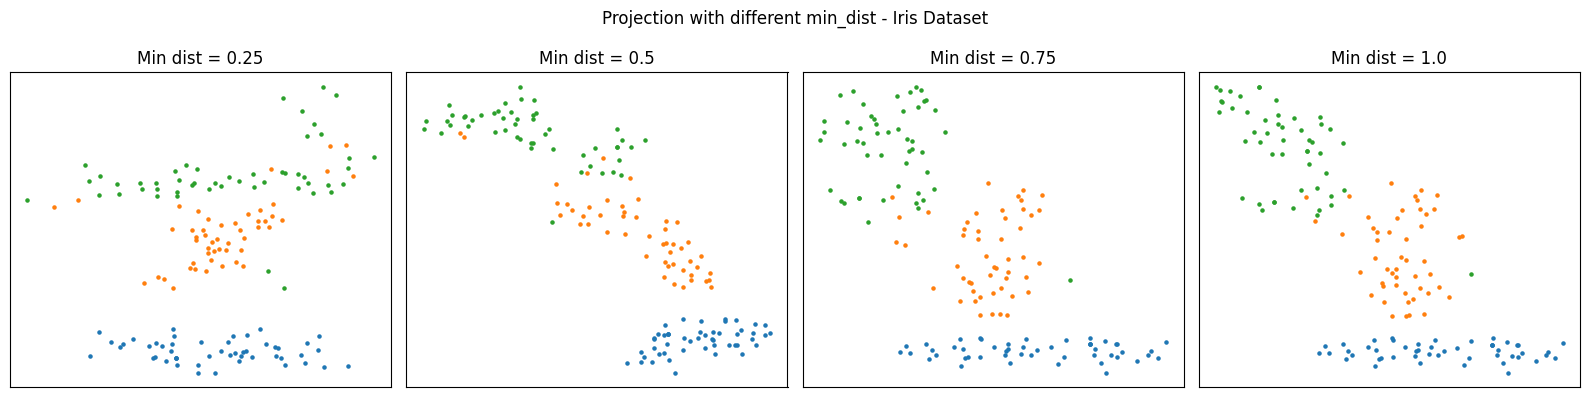

In [9]:
min_dists_iris = [0.25, 0.5, 0.75, 1.0]
fig = plot_proj_min_dists(X, y, 'class', min_dists_iris)
fig.suptitle('Projection with different min_dist - Iris Dataset')
plt.show()

## Seeds

In [10]:
data_seeds = pd.read_csv('data/UCI/seeds/seeds_dataset.txt', sep='\t',
                         header=None,
                         names=['x1','x2','x3','x4','x5','x6','x7','class'])

X_seeds = data_seeds.copy().drop(['class'], axis=1)
y_seeds = data_seeds[['class']]

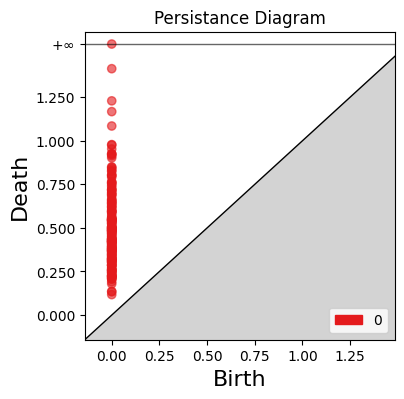

In [11]:
plot_persistance_diagram(X_seeds)
plt.show()

In [12]:
max_dist = 1.0

topocut_seeds = TopoMapCut(X_seeds.to_numpy(),
                           max_dist=max_dist,
                           proj_method='tsne',
                           ignore_outliers=False)
proj_seeds = topocut_seeds.run()
print(f'Number of components: {len(topocut_seeds.subsets)}')

[INFO] Min distance hit. Distance: 1.084635127588997 | Max_dist: 1.0
Number of components: 5


Bottleneck distance: 0.0000000000


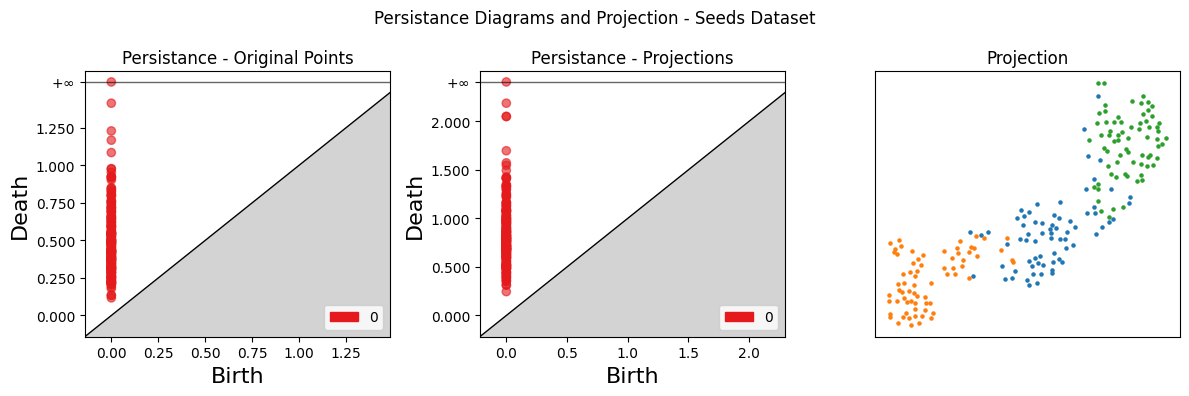

In [13]:
fig_seeds = plot_persistance_diagrams_projection(X_seeds, proj_seeds, y_seeds)
fig_seeds.suptitle('Persistance Diagrams and Projection - Seeds Dataset')
plt.show()

[INFO] Min distance hit. Distance: 0.25306291707794615 | Max_dist: 0.25
[INFO] Min distance hit. Distance: 0.5009622840094853 | Max_dist: 0.5
[INFO] Min distance hit. Distance: 0.7559737098603362 | Max_dist: 0.75
[INFO] Min distance hit. Distance: 1.084635127588997 | Max_dist: 1.0


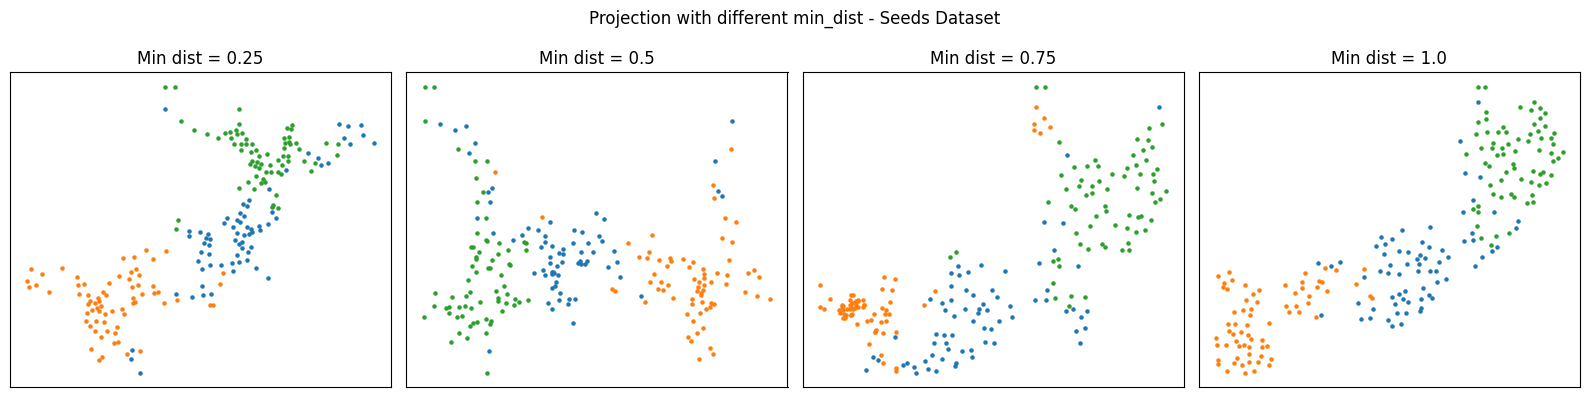

In [16]:
min_dists_seeds = [0.25, 0.5, 0.75, 1.0]
fig = plot_proj_min_dists(X_seeds, y_seeds, 'class', min_dists_seeds, ignore_outliers=False)
fig.suptitle('Projection with different min_dist - Seeds Dataset')
plt.show()

[INFO] Min distance hit. Distance: 0.25306291707794615 | Max_dist: 0.25
[INFO] Min distance hit. Distance: 0.5009622840094853 | Max_dist: 0.5
[INFO] Min distance hit. Distance: 0.7559737098603362 | Max_dist: 0.75
[INFO] Min distance hit. Distance: 1.084635127588997 | Max_dist: 1.0


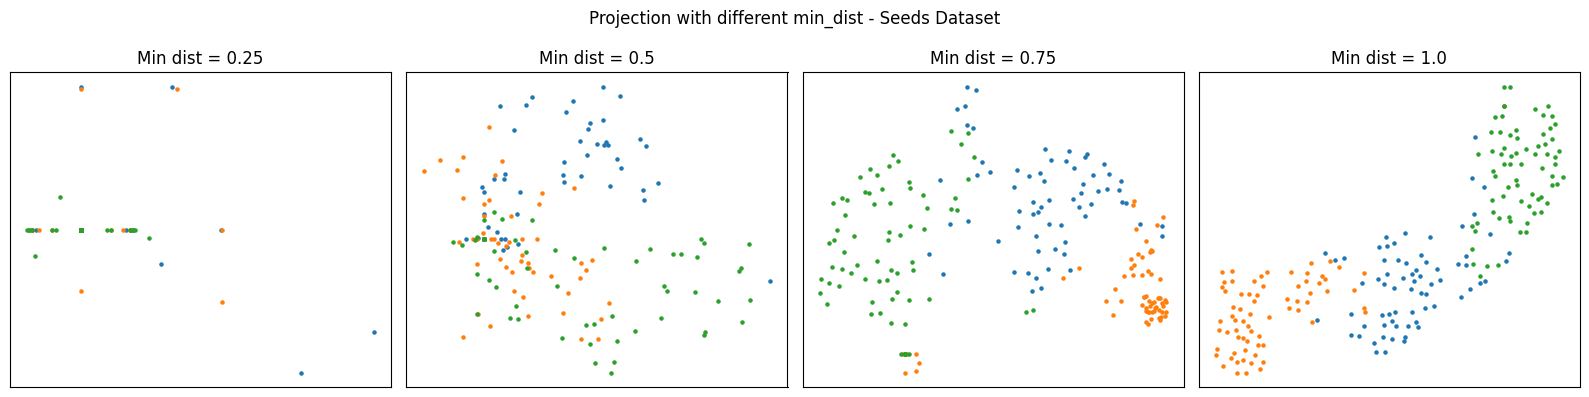

In [17]:
min_dists_seeds = [0.25, 0.5, 0.75, 1.0]
fig = plot_proj_min_dists(X_seeds, y_seeds, 'class', min_dists_seeds, ignore_outliers=True)
fig.suptitle('Projection with different min_dist - Seeds Dataset')
plt.show()

## Cancer

In [18]:
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

y_column = 'Class'

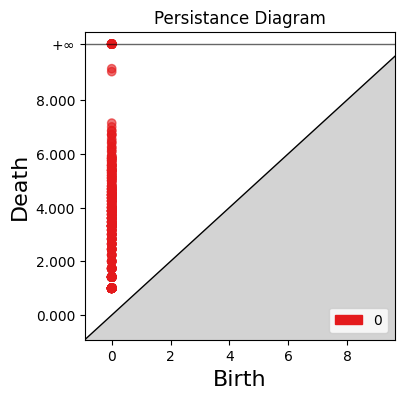

In [19]:
plot_persistance_diagram(X)
plt.show()

In [26]:
max_dist = 8.0

topocut_cancer = TopoMapCut(X.to_numpy())
components = topocut_cancer.get_components(max_dist=max_dist)
proj_cancer = topocut_cancer.run()

[INFO] Min distance hit. Distance: 9.055385138137417 | Max_dist: 8.0
[INFO] Number of edges hit. Edges processed: 681


Bottleneck distance: 0.0000000000


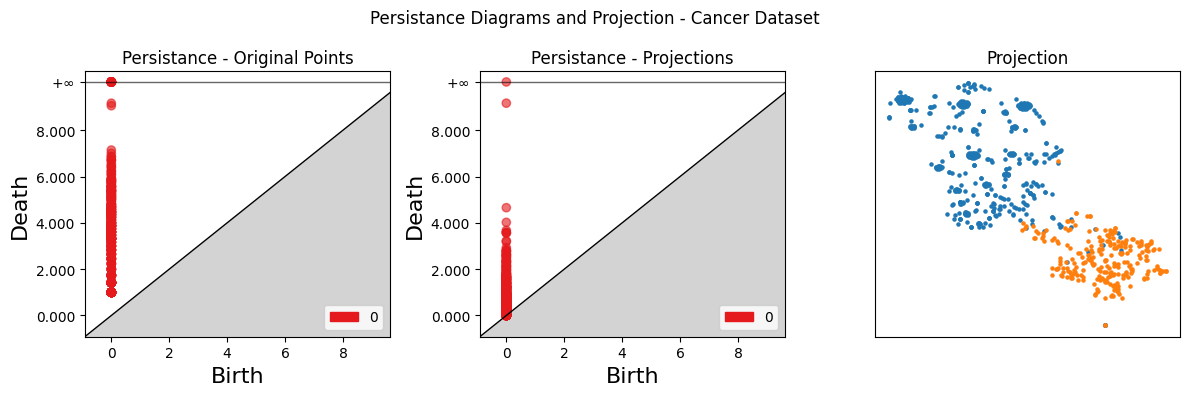

In [27]:
fig_cancer = plot_persistance_diagrams_projection(X, proj_cancer, y, y_column=y_column)
fig_cancer.suptitle('Persistance Diagrams and Projection - Cancer Dataset')
plt.show()

## MFeat

In [28]:
data_mfeat = pd.read_csv('data/UCI/multiple+features/mfeat-kar', sep='\s+',
                         header=None,
                         names=['x'+str(i) for i in range(1,65)])
data_mfeat['class'] = 0
for i, row in data_mfeat.iterrows():
    data_mfeat.loc[i,'class'] = i//200

X_mfeat = data_mfeat.drop(['class'], axis=1)
y_mfeat = data_mfeat[['class']]

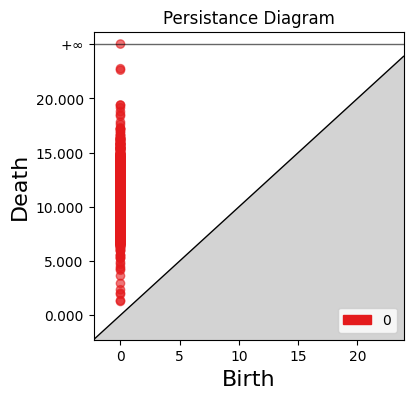

In [29]:
plot_persistance_diagram(X_mfeat)
plt.show()

In [34]:
max_dist = 20

topocut_mfeat = TopoMapCut(X_mfeat.to_numpy(),
                           max_dist=max_dist,
                           ignore_outliers=False
                           )
proj_mfeat = topocut_mfeat.run()

[INFO] Min distance hit. Distance: 22.61805324307659 | Max_dist: 20


Bottleneck distance: 0.0000000000


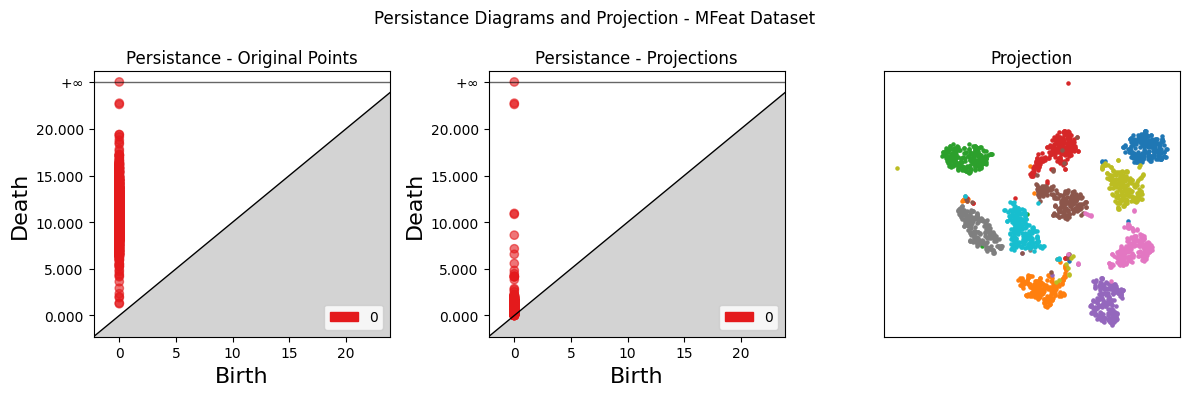

In [35]:
fig_mfeat = plot_persistance_diagrams_projection(X_mfeat, proj_mfeat, y_mfeat)
fig_mfeat.suptitle('Persistance Diagrams and Projection - MFeat Dataset')
plt.show()

[INFO] Min distance hit. Distance: 5.215668904232068 | Max_dist: 5.0
[INFO] Min distance hit. Distance: 10.001378367027483 | Max_dist: 10.0
[INFO] Min distance hit. Distance: 15.018668971463637 | Max_dist: 15.0
[INFO] Min distance hit. Distance: 22.61805324307659 | Max_dist: 20.0


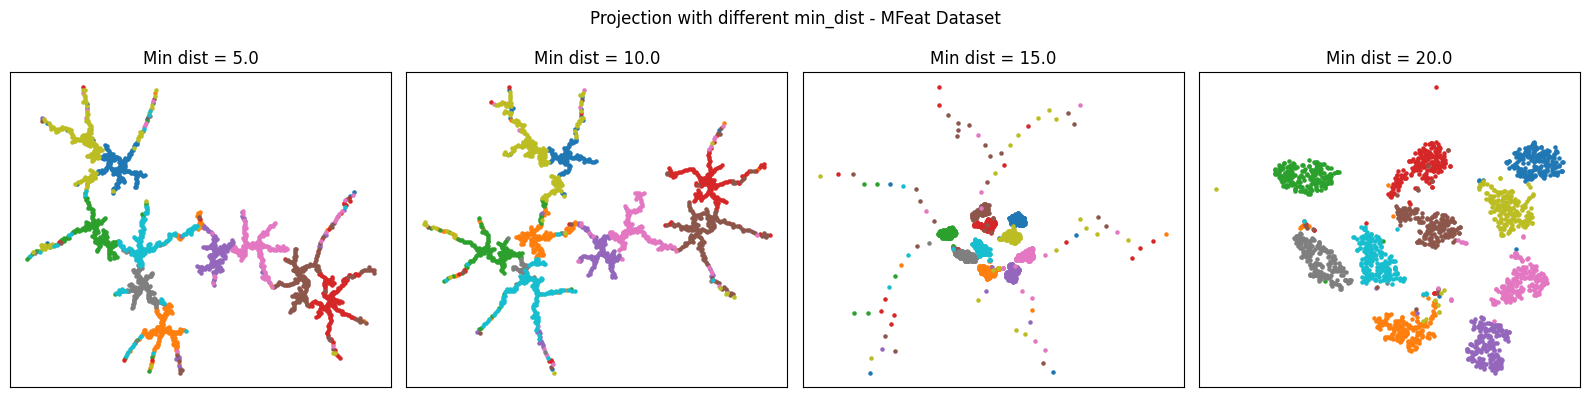

In [37]:
min_dists_mfeat = [5.0, 10.0, 15.0, 20.0]
fig = plot_proj_min_dists(X_mfeat, y_mfeat, 'class', min_dists_mfeat, ignore_outliers=False)
fig.suptitle('Projection with different min_dist - MFeat Dataset')
plt.show()

[INFO] Min distance hit. Distance: 10.001378367027483 | Max_dist: 10.0
[INFO] Min distance hit. Distance: 12.502867448507075 | Max_dist: 12.5
[INFO] Min distance hit. Distance: 15.018668971463637 | Max_dist: 15.0
[INFO] Min distance hit. Distance: 17.60687151860415 | Max_dist: 17.5


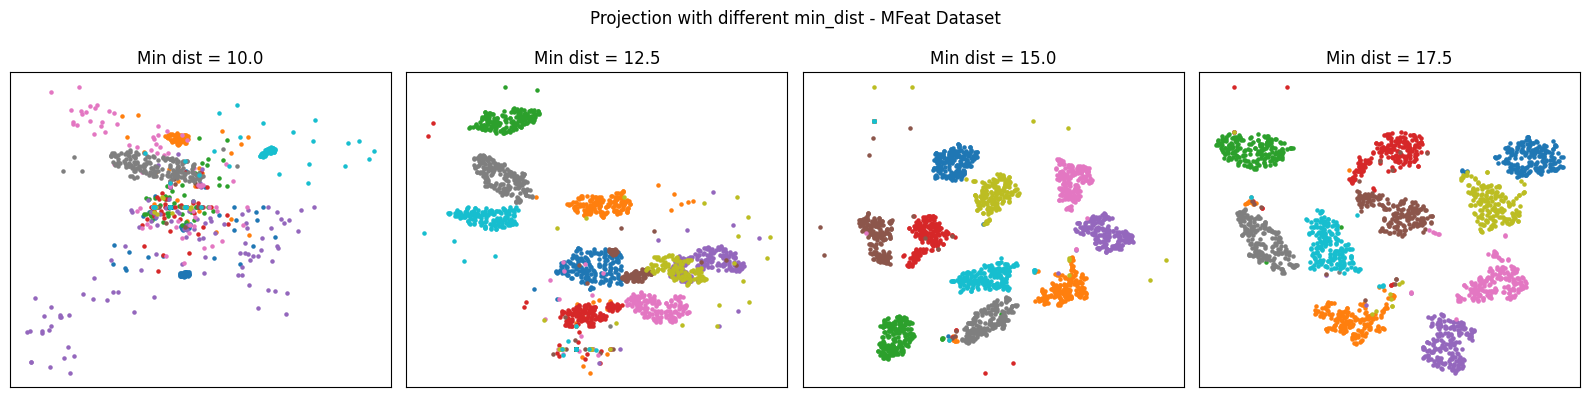

In [41]:
min_dists_mfeat = [10.0, 12.5, 15.0, 17.5]
fig = plot_proj_min_dists(X_mfeat, y_mfeat, 'class', min_dists_mfeat, ignore_outliers=True)
fig.suptitle('Projection with different min_dist - MFeat Dataset')
plt.show()

[INFO] Max components hit. # components: 100 | Max_components: 100
[INFO] Max components hit. # components: 150 | Max_components: 150
[INFO] Max components hit. # components: 200 | Max_components: 200
[INFO] Max components hit. # components: 300 | Max_components: 300


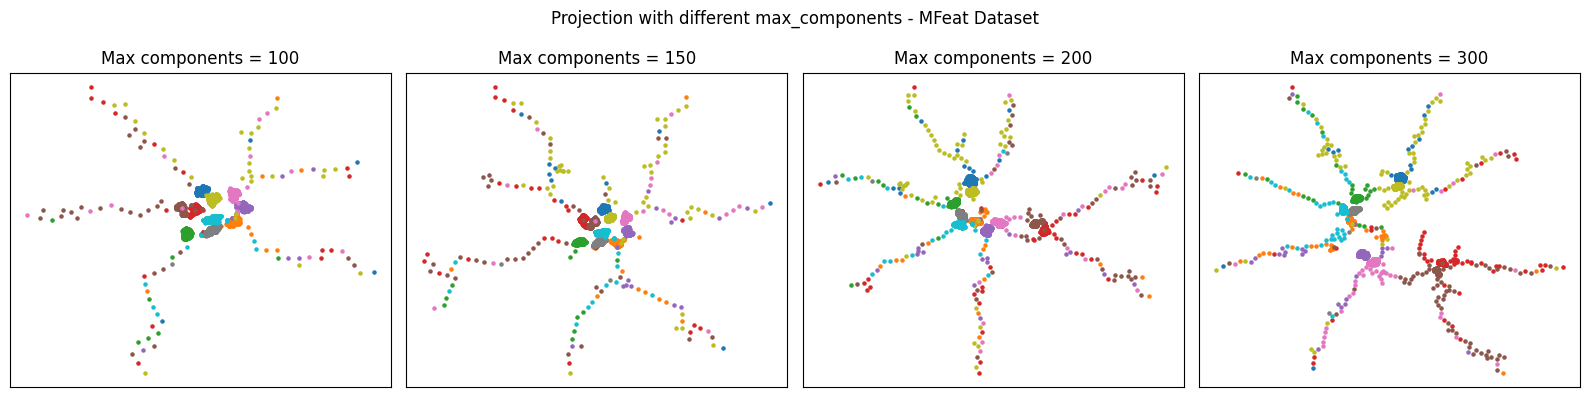

In [39]:
max_components = [100, 150, 200, 300]
fig = plot_proj_max_comps(X_mfeat, y_mfeat, 'class', max_components, ignore_outliers=False)
fig.suptitle('Projection with different max_components - MFeat Dataset')
plt.show()

[INFO] Max components hit. # components: 100 | Max_components: 100
[INFO] Max components hit. # components: 150 | Max_components: 150
[INFO] Max components hit. # components: 200 | Max_components: 200
[INFO] Max components hit. # components: 300 | Max_components: 300


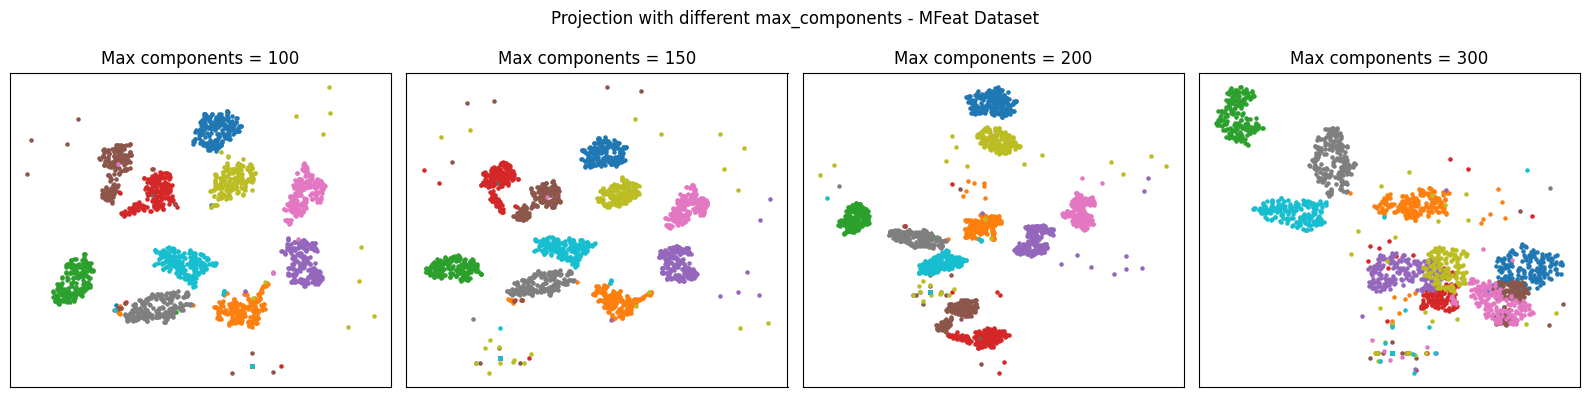

In [40]:
max_components = [100, 150, 200, 300]
fig = plot_proj_max_comps(X_mfeat, y_mfeat, 'class', max_components, ignore_outliers=True)
fig.suptitle('Projection with different max_components - MFeat Dataset')
plt.show()